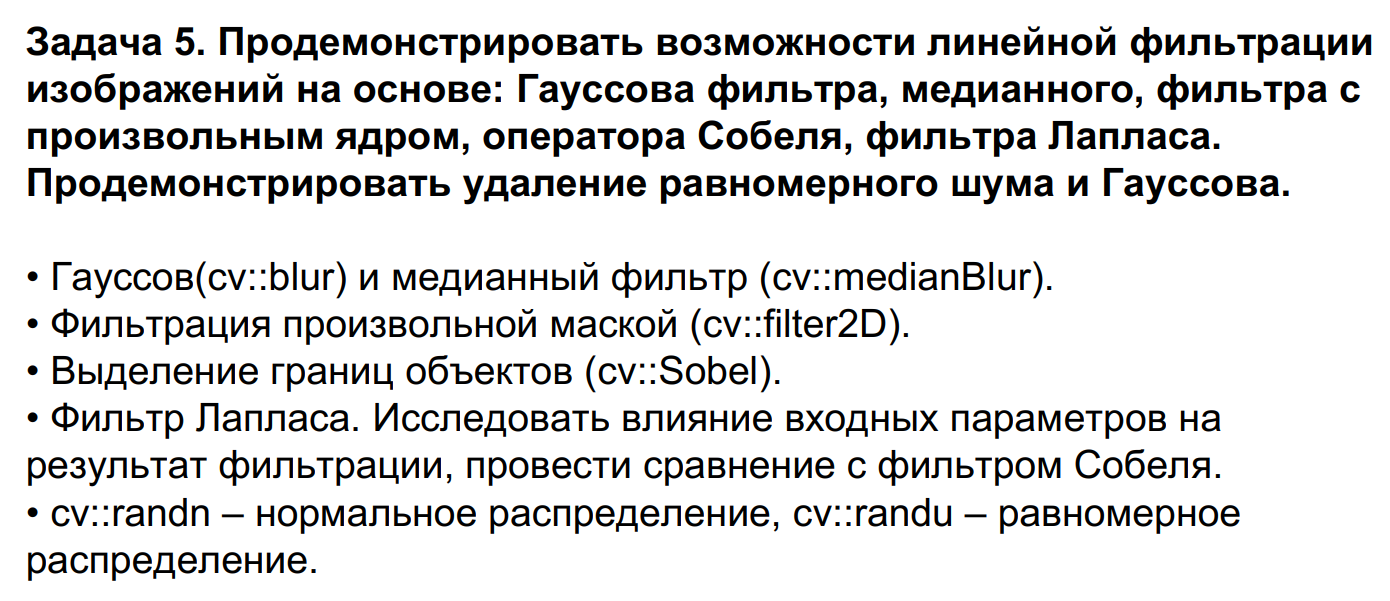

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

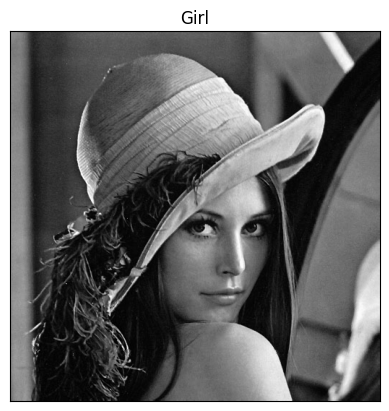

In [2]:
img = cv.imread('girl.png')
assert img is not None, "file could not be read, check with os.path.exists()"
plt.title('Girl')
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
def show_images(f_img, s_img, sizes: tuple, f_title: str, s_title: str):
    plt.figure(figsize=(sizes[0], sizes[1]))
    plt.subplot(121),plt.imshow(f_img, cmap='gray'),plt.title(f_title)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(s_img, cmap='gray'),plt.title(s_title)
    plt.xticks([]), plt.yticks([])
    plt.show()

## Gaussian FIlter

In [4]:
def gaussian_filter(img, kernel_size_x: int, kernel_size_y: int):
     
    assert (kernel_size_x and kernel_size_y) > 0, 'Kernel size has to be positive'
    assert kernel_size_x % 2 != 0 and kernel_size_y % 2 != 0, 'Kernel size has to be odd number'        
    
    gauss = cv.blur(img, (kernel_size_x, kernel_size_y))
    
    show_images(img, gauss, (15, 15), 'Original', 'Gaussian Filter')

## Median Filter

In [6]:
def median_filter(img, kernel_size: int):
     
    assert kernel_size > 0, 'Kernel size has to be positive'
    assert kernel_size % 2 != 0, 'Kernel size has to be odd number'        
    
    median = cv.medianBlur(img, kernel_size)
    
    show_images(img, median, (15, 15), 'Original', 'Median Filter')

## Filter 2D

In [8]:
def filter2D(img, kernel_size: int):
     
    assert kernel_size > 0, 'Kernel size has to be positive'
    assert kernel_size % 2 != 0, 'Kernel size has to be odd number'        
    
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    filter2d = cv.filter2D(img, -1, kernel)
    
    show_images(img, filter2d, (15, 15), 'Original', 'Filter2D')

In [10]:
def create_noisy_image(img, noise_level):
    noisy_img = img.copy()
    for i in range(noisy_img.shape[0]):
        for j in range(noisy_img.shape[1]):
            noise = np.random.normal(0, noise_level)            
            if noise + np.mean(noisy_img[i][j]) > 255:
                noisy_img[i][j] = 255
            elif noise + np.mean(noisy_img[i][j]) < 0:
                noisy_img[i][j] = 0
            else:
                noisy_img[i][j] = noise + noisy_img[i, j]
    return noisy_img

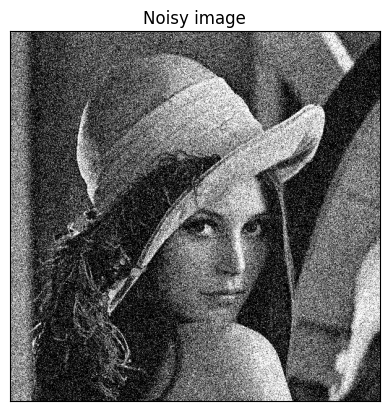

In [11]:
noisy_img = create_noisy_image(img, 50)
plt.title('Noisy image')
plt.imshow(noisy_img)
plt.xticks([]), plt.yticks([])
plt.show()

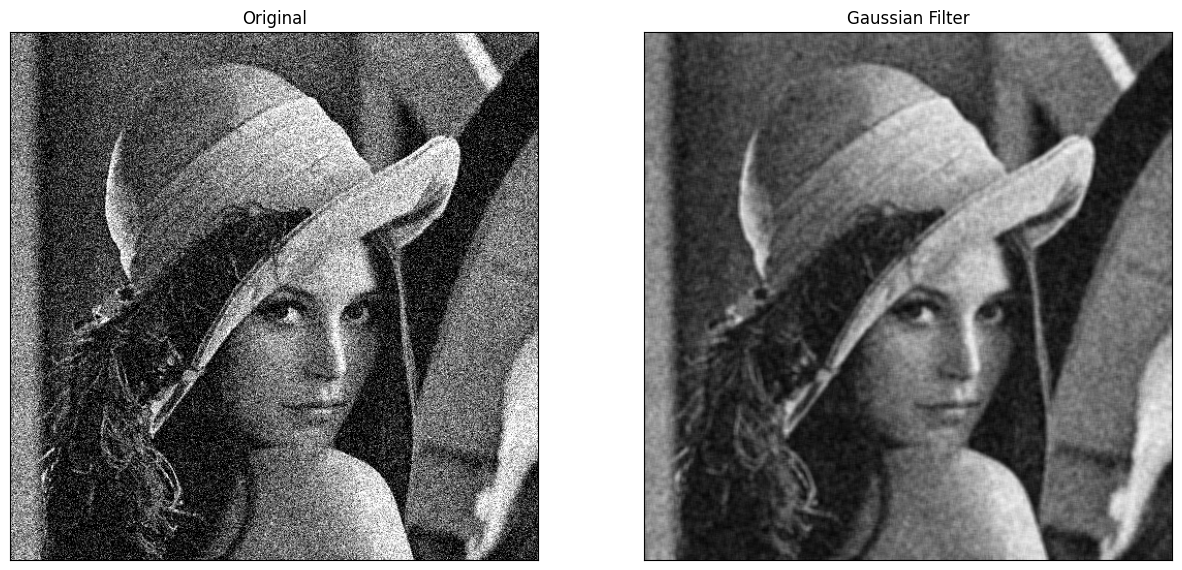

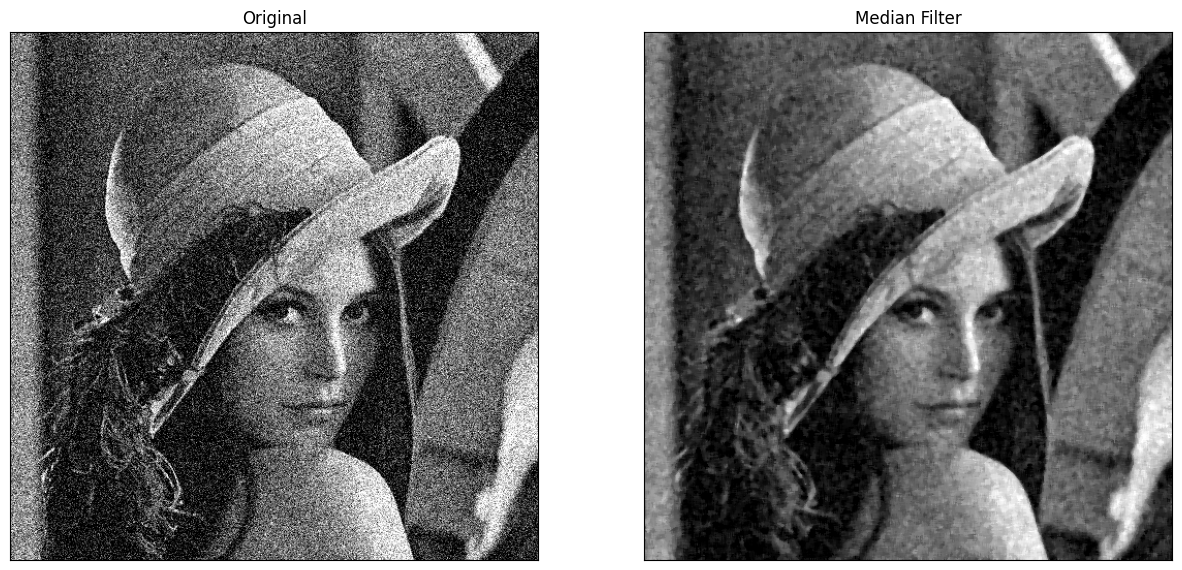

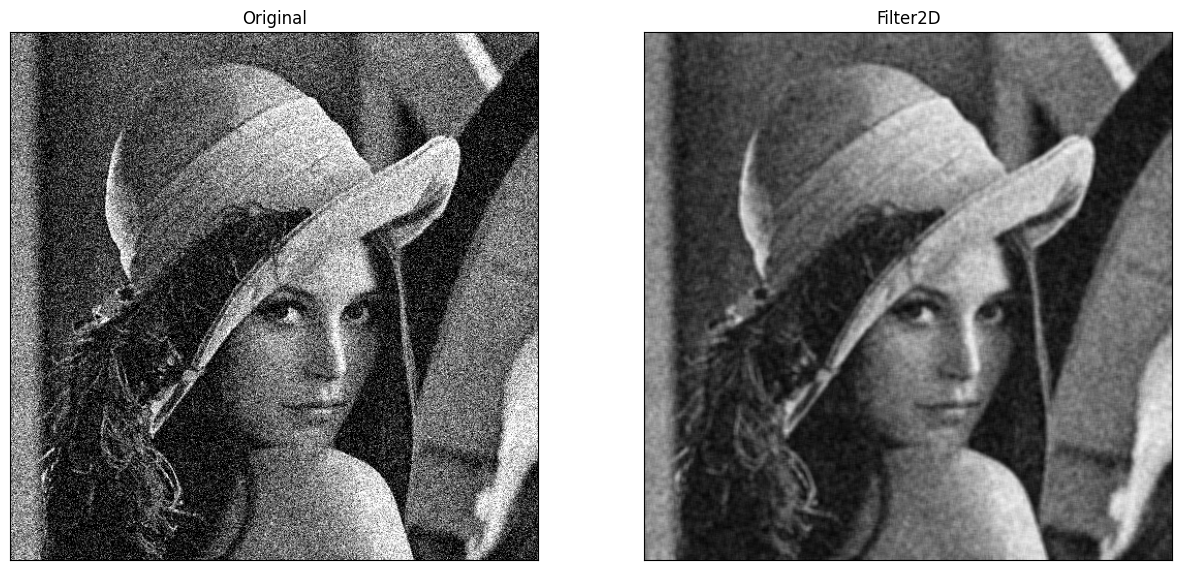

In [12]:
gaussian_filter(noisy_img, 5, 5)
median_filter(noisy_img, 5)
filter2D(noisy_img, 5)

## Sobel

In [13]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ddepth = cv.CV_16S

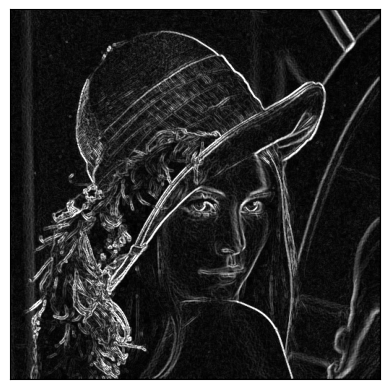

In [14]:
grad_x = cv.Sobel(gray, ddepth, 1, 0, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
sobel = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(sobel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

## Laplace

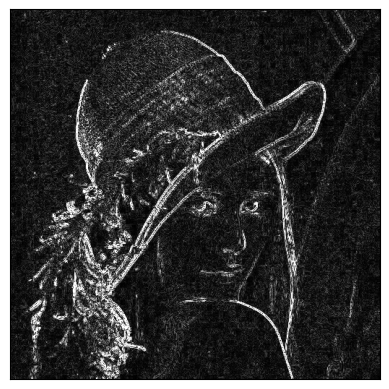

In [15]:
gaussian_blur = cv.blur(img, (3,3))
laplace = cv.Laplacian(gray, ddepth, ksize=3)
laplace = cv.convertScaleAbs(laplace)
plt.imshow(laplace, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

## Comparison

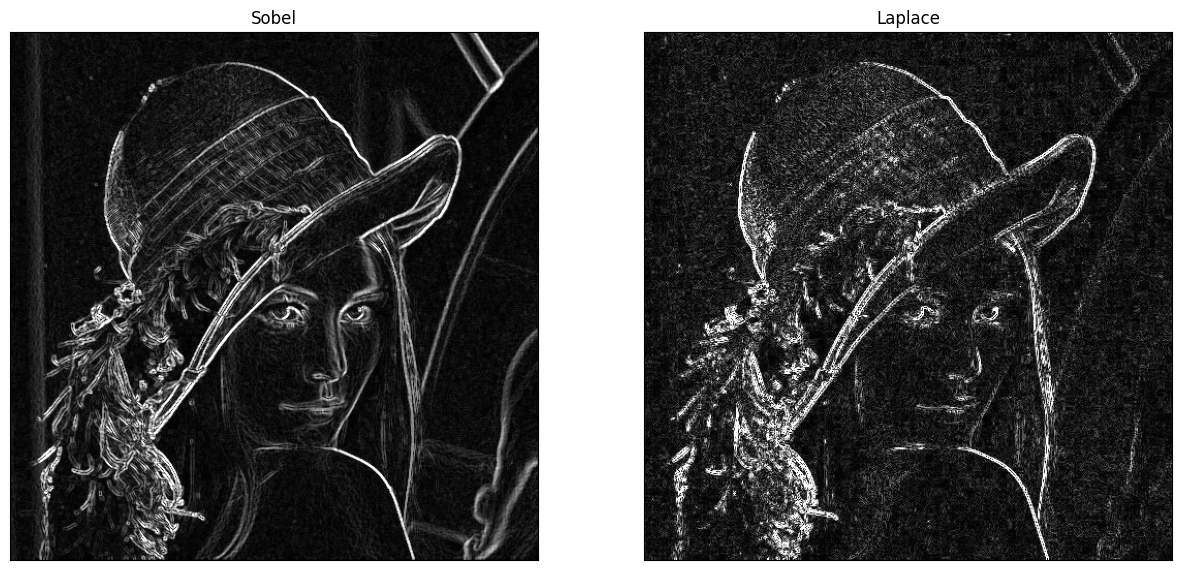

In [16]:
show_images(sobel, laplace, (15,15), 'Sobel', 'Laplace')